In [1616]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
import numpy as np
from numpy import mean, std
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Gacha, Gambling and Genshin Impact: Predicting the likelihood of a Desired Character Rerun
### by Chisomebi Agwu


Released in the Winter 2020, **Genshin Impact** is one of the newest and increasingly multiplatform video games as of 2021. Having a networth of 1 billion dollars from its mobile phone platform alone and winning The Game Award for Best Mobile Game during its first year, it has captivated the hearts and minds of millions of players all over the world.

**Genshin Impact** is a action, roleplaying, open world Gacha game that follows the protagonsit, The Traveler, through their journey in Teyvat, a world ruled by gods called archons who grant specific **Elements** to civilians of that world. 

One of the greatest appeals of Genshin Impact is that it is virtually "free." In other words, access to any playable resources in Genshin Impact is not locked behind any paywalls. Even the download is completely free! A player can access *all* contents of the game without paying a d single dime.

However, the real question is: "How can a 'free' game like Genshin Impact generate that much revenue?" and the primary answer is simple: it's because it's a Gacha game.

## What is Gacha?
***
" Gacha games operate [by spending] money to open boxes or packs, or collect items, cards, and characters. These are often from a popular manga or anime franchise. You then use them to battle other players and complete challenges. These cards and characters also typically have variations to them, such as star rankings or levels.

The highest-ranking and most powerful collectibles are very rare and difficult to obtain. Getting them can involve opening thousands of boxes and many **microtransactions**." - (<a href='https://www.howtogeek.com/465429/what-exactly-is-a-gacha-video-game/'>How-To-Geek </a>)
***

Technically, while a player can access all contents of the game without paying a single dime, it doesn't mean they usually do. These *microtransactions* for a single 'rare character/weapon' can add up to hundreds, or even thousands, of dollars for a single player. An in-game currency, **Primogems**, is used to *randomly wish* for these characters and weapons when they appear on *character or event banners.* Naturally, these in-game currency can be bought with real money. Using the cheapest Dollar-for-Primogem package, a wish is worth $2.64 c(an vary depending on a which package you buy).

Below is a brief explanation of the Wishing System in Genshin Impact:
* A player is guaranteed any 4-Star character on the Limited Event Banner (i.e non-rare) by the 10th wish (Worst-Case: 10 Wishes = $26.4). There are always 3 4-Stars on a Limited Event Banner.
* A player is guaranteed a 5-Star on the Limited Event Banner by the 90th wish. However, several conditions apply. It is possible that the pulled 5-Star may not be the character on the Banner. If that is the case, the player *is* guaranteed the 5-Star character on the banner by the next 90th wish. (Worst Case: 180 Wishes = $475.2. If not, Worst Case: 90 Wishes = $237.6)

## Objective and Goals
The goal of any Gacha game is to "collect them all." Who wouldn't, if they could? Stronger characters, stronger weapons. Better teams, cooler gameplay.

People depend on the 'luck' of their Gacha, spending little amounts of cash *many* times for a *single* rare object that may not even be the Character they desire. Genshin Impact, despite their unadulterated nature, operates on randomness, luck and money at the end of the day. As a result, more and more discussions are being had on the <a href = 'https://www.greo.ca/Modules/EvidenceCentre/files/Sztainert%20(2018)%20Loot%20boxes%20and%20gambling.pdf'> harmful gambling tactics Gacha-based games employ</a>.

The Video Game industry is one of the most tapped-into markets today. People will never stop spending video games.

However, there are some things one can do to minimze the money spent on Gacha-games like Genshin Impact by specifically waiting, saving and wishing for characters on a Limited-Event Banner that will be a best fit to their team of characters.

In this tutorial, we will be:
1. evaluating the base statistics of every availble character in Genshin Impact, and determining which characters to wish for based on certain criteria. 
2. examining the categories that influence the likelihood of a certain characters being put on Limited-Time Banners.

# Importing the Datasets
We will be using the data provided by the open-source <a href="https://genshin-impact.fandom.com/wiki/Characters">Genshin Impact Fandom Wiki</a> website using **BeautifulSoup**. This python library is allows us to read and parse html.
* *url_1* displays a page with the general information regarding a character i.e base attack, HP%, etc,
* *url_2* displays a a page describing additional character information i.e weapon, rarity, etc.


In [1617]:
ur1_1 = 'https://genshin-impact.fandom.com/wiki/Characters/Comparison#Normal_Attacks'
url_2='https://genshin-impact.fandom.com/wiki/Characters/List'

with open(f'character_comparison_1.html') as fp:
    soup = BeautifulSoup(fp, "html.parser")

with open(f'character_comparison_2.html') as fp:
    soup2 = BeautifulSoup(fp, "html.parser")

table1 = soup.find_all('table', {"class": "article-table sortable jquery-tablesorter"})[0]
table2 = soup2.find_all('table', {"class": "article-table sortable jquery-tablesorter"})[0]

*table1* and *table2* are the raw html code that generated the first tables seen when opening *url_1* and *url_2* respectively. By using **re**, we can extract the exact html code we want in order to manually construct our dataframes.

Below is snippet of what table1 (and table2) relatively look like before parsing - raw html.

In [1618]:
print(str(table1)[1655:1751])

</td>
<td>10,899
</td>
<td>234
</td>
<td>676
</td>
<td>Cryo DMG Bonus
</td>
<td>28.8%
</td></tr>


# Data Preprocessing and Parsing
This will provide the foundation for our tutorial. Websites can be susceptible to constant change, so constructing a dataframe onl from a URL may pose some issues both now, and in the future. For the longevity and robustness of this project, these html files have been saved in the project directory. Also, instead of using only the URLs, we will be parsing the HTML code directly!

We will be tokenizing the html by splitting across the *tr* tags. These tags correspond to the rows in the table. We will split up the *tr* tags even further to collect the values for each row-column pair in the table.

*findAll* returns a list of all instances of the *tr* tags found in the given object (i.e table1 and table2). The first elements just represents the attributes of the column, so we can remove them, and define them ourselves.

In [1619]:
all_rows_in_table1 = table1.findAll("tr")
all_rows_in_table2 = table2.findAll("tr")

all_rows_in_table1.pop(0)
all_rows_in_table2.pop(0)
all_rows_in_table2

table1_col = ['Name', 'HP', 'ATK', 'DEF', 'Ascension Stat', 'Ascention Stat Value']
table2_col = ['Name', 'Element', 'Weapon', 'Sex', 'Nation', 'Rarity']


Here is where the real parsing begins. Like mentioned before, we will split across *tr* tags and split further within those tags to get our values for Name, HP, ATK, and so on. 

While doing this, we will use <a href='https://www.w3schools.com/python/python_lists_comprehension.asp'> **list comprehension**</a>, <a href = 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html'>**Pandas.Dataframe.filter()**</a>, and **string manipulation (i.e replace(...)** to get rid of unwanted characters such as newlines, or NaN.

In [1620]:
full_arr = []
counter = 0
for element in all_rows_in_table1:
    element_s = str(element)
    target = re.split(r"<.*?>", element_s)
    # Data preprocessing
    target = list(filter(None, target)) # Removes null values
    target = [x for x in target if x != '\n'] # Removes newline characters as elements
    index = 0
    # Removes new lines from element
    for x in target:
        if '\n' in x:
            target[index] = x.replace('\n', '')
        index = index + 1
    full_arr.append(target)
    counter += 1
data = full_arr
table1 = pd.DataFrame(data, columns=table1_col)
display(table1.head(5))

,Name,HP,ATK,DEF,Ascension Stat,Ascention Stat Value
0,Albedo,"13,226",251,876,Geo DMG Bonus,28.8%
1,Aloy,"10,899",234,676,Cryo DMG Bonus,28.8%
2,Amber,"9,461",223,601,ATK,24.0%
3,Barbara,"9,787",159,669,HP,24.0%
4,Beidou,"13,050",225,648,Electro DMG Bonus,24.0%


We will repeat the process for the second table.

In [1621]:
full_arr = []
counter = 0
for element in all_rows_in_table2:
    element_s = str(element)
    target = re.split(r"<.*?>", element_s)
    # Data preprocessing
    target = list(filter(None, target)) # Removes null values
    target = [x for x in target if x != '\n'] # Removes newline characters as elements
    target = [x for x in target if x != ' '] 
    index = 0
    # Removes new lines from element
    for x in target:
        if '\n' in x:
            target[index] = x.replace('\n', '')
        index = index + 1
    # Determing Character's Rarity.
    if '5 Stars' in element_s:
        target.append('5')
    elif '4 Stars' in element_s:
        target.append('4')
    full_arr.append(target)
    counter += 1
data = full_arr
table2 = pd.DataFrame(data, columns=table2_col)
display(table2.head(5))

,Name,Element,Weapon,Sex,Nation,Rarity
0,Albedo,Geo,Sword,Male,Mondstadt,5
1,Aloy,Cryo,Bow,Female,5,None
2,Amber,Pyro,Bow,Female,Mondstadt,4
3,Barbara,Hydro,Catalyst,Female,Mondstadt,4
4,Beidou,Electro,Claymore,Female,Liyue,4


# Data Wrangling: Merging Tables

Now that we have successfully constructed our two tables, we want to join them in order to centralize all the data. Pandas allows us to do this using *merge.* By default, the type of merge is inner.

In [1622]:
table = table1.merge(table2)
table['HP'] = [x.replace(",", "") for x in table['HP'].tolist()] # Removes commas in HP numeric values for better calculations.
display(table.head(5))
print(table.info())

,Name,HP,ATK,DEF,Ascension Stat,Ascention Stat Value,Element,Weapon,Sex,Nation,Rarity
0,Albedo,13226,251,876,Geo DMG Bonus,28.8%,Geo,Sword,Male,Mondstadt,5
1,Aloy,10899,234,676,Cryo DMG Bonus,28.8%,Cryo,Bow,Female,5,None
2,Amber,9461,223,601,ATK,24.0%,Pyro,Bow,Female,Mondstadt,4
3,Barbara,9787,159,669,HP,24.0%,Hydro,Catalyst,Female,Mondstadt,4
4,Beidou,13050,225,648,Electro DMG Bonus,24.0%,Electro,Claymore,Female,Liyue,4


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  42 non-null     object
 1   HP                    42 non-null     object
 2   ATK                   42 non-null     object
 3   DEF                   42 non-null     object
 4   Ascension Stat        42 non-null     object
 5   Ascention Stat Value  42 non-null     object
 6   Element               42 non-null     object
 7   Weapon                42 non-null     object
 8   Sex                   42 non-null     object
 9   Nation                42 non-null     object
 10  Rarity                40 non-null     object
dtypes: object(11)
memory usage: 3.9+ KB
None


By using *table.info()*, we can see that our table consists of two Null values. We will be dropping these Null-containing rows that are characters who cannot appear on any Banner whatsoever (i.e Traveler and Aloy)

In [1623]:
table.drop([1, 33], inplace = True)
table.index = range(len(table)) # Reindexing dataframe

Below is our fully parsed and cleaned table.

In [1624]:
display(table)

,Name,HP,ATK,DEF,Ascension Stat,Ascention Stat Value,Element,Weapon,Sex,Nation,Rarity
0,Albedo,13226,251,876,Geo DMG Bonus,28.8%,Geo,Sword,Male,Mondstadt,5
1,Amber,9461,223,601,ATK,24.0%,Pyro,Bow,Female,Mondstadt,4
2,Barbara,9787,159,669,HP,24.0%,Hydro,Catalyst,Female,Mondstadt,4
3,Beidou,13050,225,648,Electro DMG Bonus,24.0%,Electro,Claymore,Female,Liyue,4
4,Bennett,12397,191,771,Energy Recharge,26.7%,Pyro,Sword,Male,Mondstadt,4
5,Chongyun,10984,223,648,ATK,24.0%,Cryo,Claymore,Male,Liyue,4
6,Diluc,12981,335,784,CRIT Rate,19.2%,Pyro,Claymore,Male,Mondstadt,5
7,Diona,9570,212,601,Cryo DMG Bonus,24.0%,Cryo,Bow,Female,Mondstadt,4
8,Eula,13226,342,751,CRIT DMG,38.4%,Cryo,Claymore,Female,Mondstadt,5
9,Fischl,9189,244,594,ATK,24.0%,Electro,Bow,Female,Mondstadt,4


# Exploratory Data Analysis I
With out reference table completely parsed and cleaned, we can move forward into the analysis. For this part of the analysis, we will be focusing on data visualizations. That is, we want to be able to derive information from our graph. Ultimately, we wil try to explore the relationship of certain categorical variables between the two Rarity classes i.e 5 Stars and 4-Stars

We will be examining these variables:
1. Element
2. Weapon 
3. Sex 
4. Nation
5. Rarity

Before we begin, we will remove characters that cannot appear on any banners (i.e Aloy and Traveler)

In [1625]:
eda1 = table.copy()
eda1.drop([1, 33], inplace = True)
eda1.index = range(len(eda1)) # Reindexing dataframe

We will also be splitting the table based on their rarities. This is called **dataframe slicing**. It is a feature of Pandas.Dataframe that allows us to select certain subsets of rows and/or columns

In [1626]:
eda1['Rarity'] = [int(x) for x in eda1['Rarity'].tolist()]
fivestar = eda1[eda1['Rarity'] == 5].copy()
fourstar = eda1[eda1['Rarity'] == 4].copy()

Structure of Frequency Plots.
* Using the **matplotlib** library to generate bar charts easily.
* Two bars to every bin to represent 5 Stars and 4 Stars.

### Element Frequency

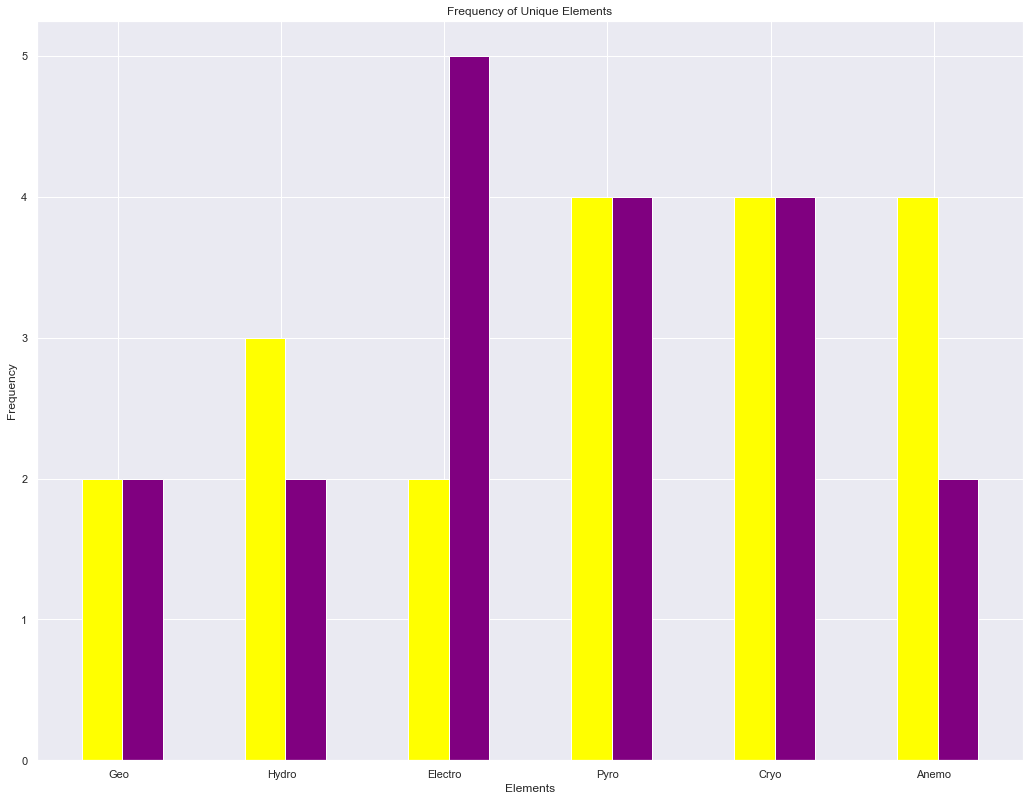

In [1627]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
unique_elements = eda1.Element.unique().tolist()
element_frequency = [[] for _ in range(2)] # A 2D array or length two.

X = np.arange(len(unique_elements))

for element in unique_elements:
    element_frequency[0].append(len(fivestar[fivestar['Element'] == element]))

for element in unique_elements:
    element_frequency[1].append(len(fourstar[fourstar['Element'] == element]))

ax.bar(X + 0.0, element_frequency[0], color = 'yellow', width = 0.25)
ax.bar(X + 0.25, element_frequency[1], color = 'purple', width = 0.25)
ax.set_xticks(np.linspace(0.1, 5.1, num = len(unique_elements)))
ax.set_xticklabels(unique_elements)
plt.title('Frequency of Unique Elements')
plt.xlabel('Elements')
plt.ylabel('Frequency')
plt.show()

From this graph, we can see that there is that most 5-Star characters are either Pyro, Cryo or Anemo. However, most 4-Star characters tend to generally be Pyro, with a considerable emphasis on Electro and Cryo.

### Weapon Frequency

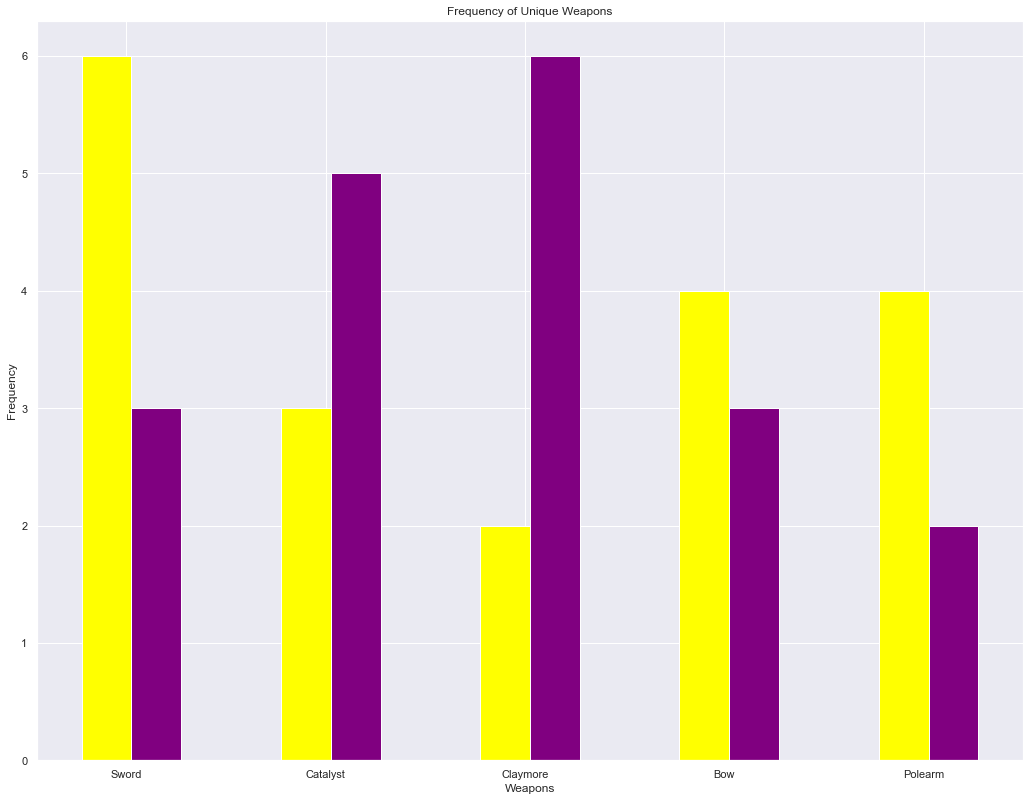

In [1628]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
unique_weapons = eda1.Weapon.unique().tolist()
weapon_frequency = [[] for _ in range(2)] # Length is the number of bars.

X = np.arange(len(unique_weapons))

for weapon in unique_weapons:
    weapon_frequency[0].append(len(fivestar[fivestar['Weapon'] == weapon]))

for weapon in unique_weapons:
    weapon_frequency[1].append(len(fourstar[fourstar['Weapon'] == weapon]))

ax.bar(X + 0.0, weapon_frequency[0], color = 'yellow', width = 0.25)
ax.bar(X + 0.25, weapon_frequency[1], color = 'purple', width = 0.25)
ax.set_xticks(np.linspace(0.1, 4.1, num = len(unique_weapons)))
ax.set_xticklabels(unique_weapons)
plt.title('Frequency of Unique Weapons')
plt.xlabel('Weapons')
plt.ylabel('Frequency')
plt.show()

These values are not uniform for both 5-Star and Four-Star characters. There seems to be a high concentration of Sword users for Five-Stars and Claymores for Four-Star characters.

### Sex Frequency

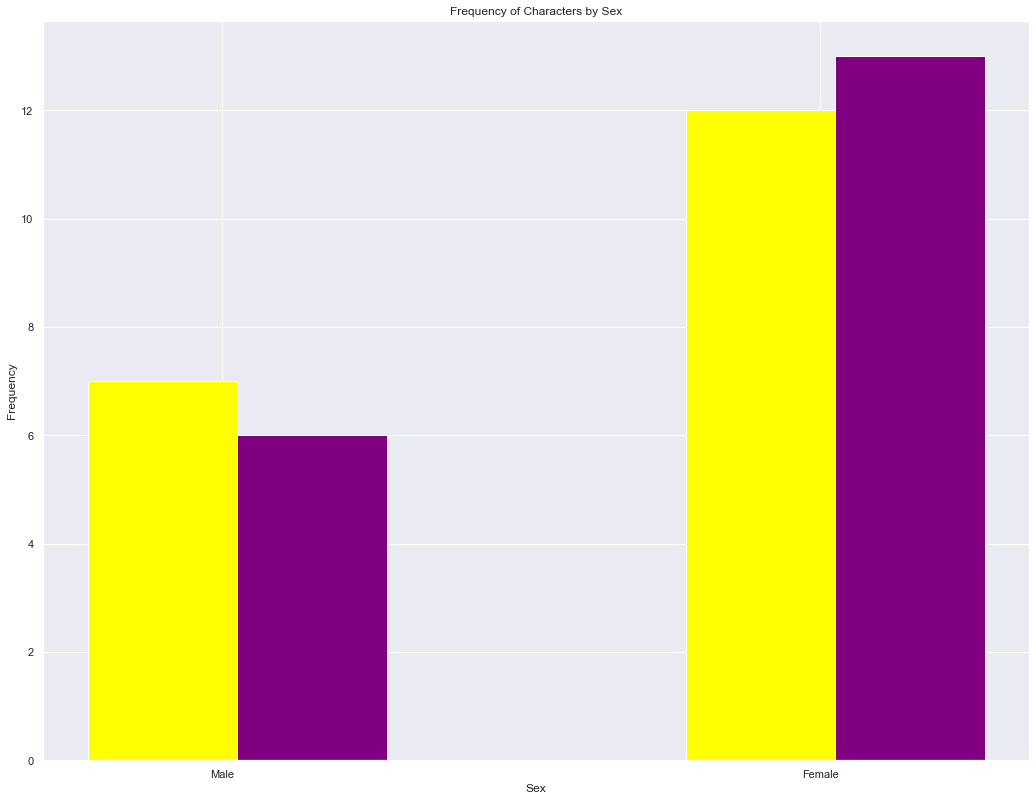

In [1629]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
unique_sex = eda1.Sex.unique().tolist()
sex_frequency = [[] for _ in range(2)] # Length is the number of bars.

X = np.arange(len(unique_sex))

for sex in unique_sex:
    sex_frequency[0].append(len(fivestar[fivestar['Sex'] == sex]))

for sex in unique_sex:
    sex_frequency[1].append(len(fourstar[fourstar['Sex'] == sex]))

ax.bar(X + 0.0, sex_frequency[0], color = 'yellow', width = 0.25)
ax.bar(X + 0.25, sex_frequency[1], color = 'purple', width = 0.25)
ax.set_xticks(np.linspace(0.1, 1.1, num = len(unique_sex)))
ax.set_xticklabels(unique_sex)
plt.title('Frequency of Characters by Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

Wow! There seems to be a signifanct amount of female characters compared to male characters in general. However, when differentiating between 5-Stars and 4-Stars, the number of male characters is rather uniform.

### Nation Frequency

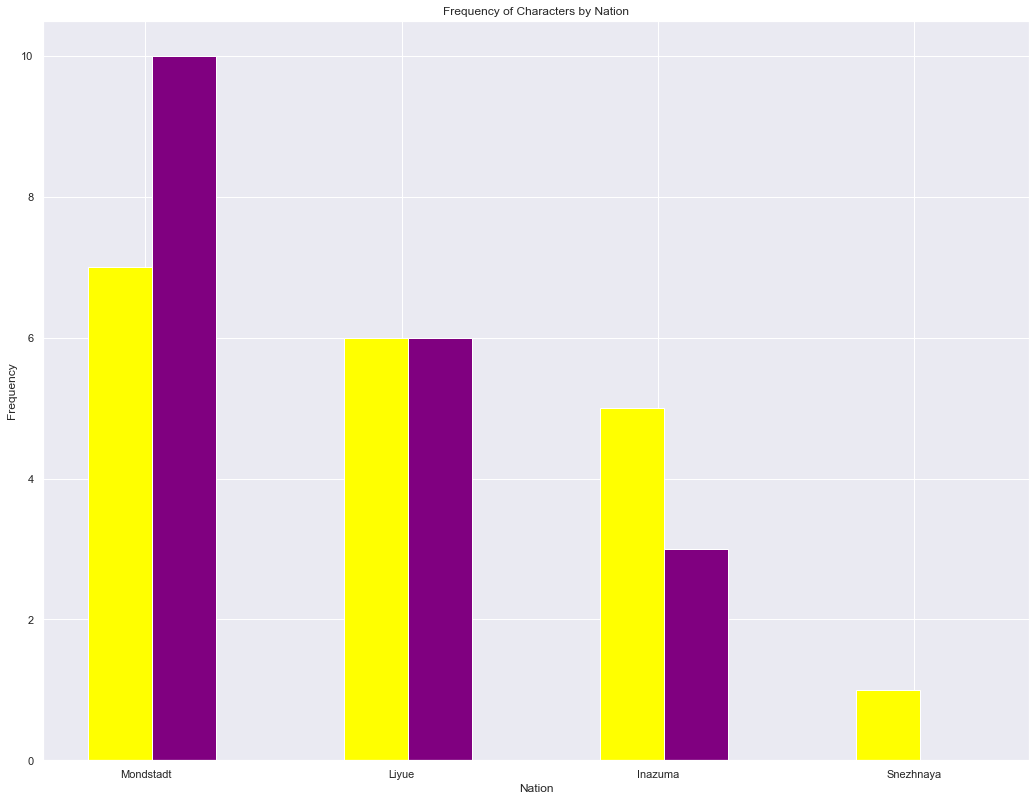

In [1630]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
unique_nation = eda1.Nation.unique().tolist()
nation_frequency = [[] for _ in range(2)] # Length is the number of bars.

X = np.arange(len(unique_nation))

for nation in unique_nation:
    nation_frequency[0].append(len(fivestar[fivestar['Nation'] == nation]))

for nation in unique_nation:
    nation_frequency[1].append(len(fourstar[fourstar['Nation'] == nation]))

ax.bar(X + 0.0, nation_frequency[0], color = 'yellow', width = 0.25)
ax.bar(X + 0.25, nation_frequency[1], color = 'purple', width = 0.25)
ax.set_xticks(np.linspace(0.1, 3.1, num = len(unique_nation)))
ax.set_xticklabels(unique_nation)
plt.title('Frequency of Characters by Nation')
plt.xlabel('Nation')
plt.ylabel('Frequency')
plt.show()

Before we interpret these results, it is important to mention this: Mondstadt is the oldest active nation, followed by Liyue and Inazuma. Snezhnaya is not an active nation despite having a player originate from there. (By active, I mean that the world is not accessible for players).

By these results, the amount 4-Stars to each nation is proprotional to the amount of 5-Stars to each nation at this time. In other words, most 5-Stars are from Mondstadt, Liyue then Inazuma, and the same pattern follows for 4-Stars.

### Rarity Frequency

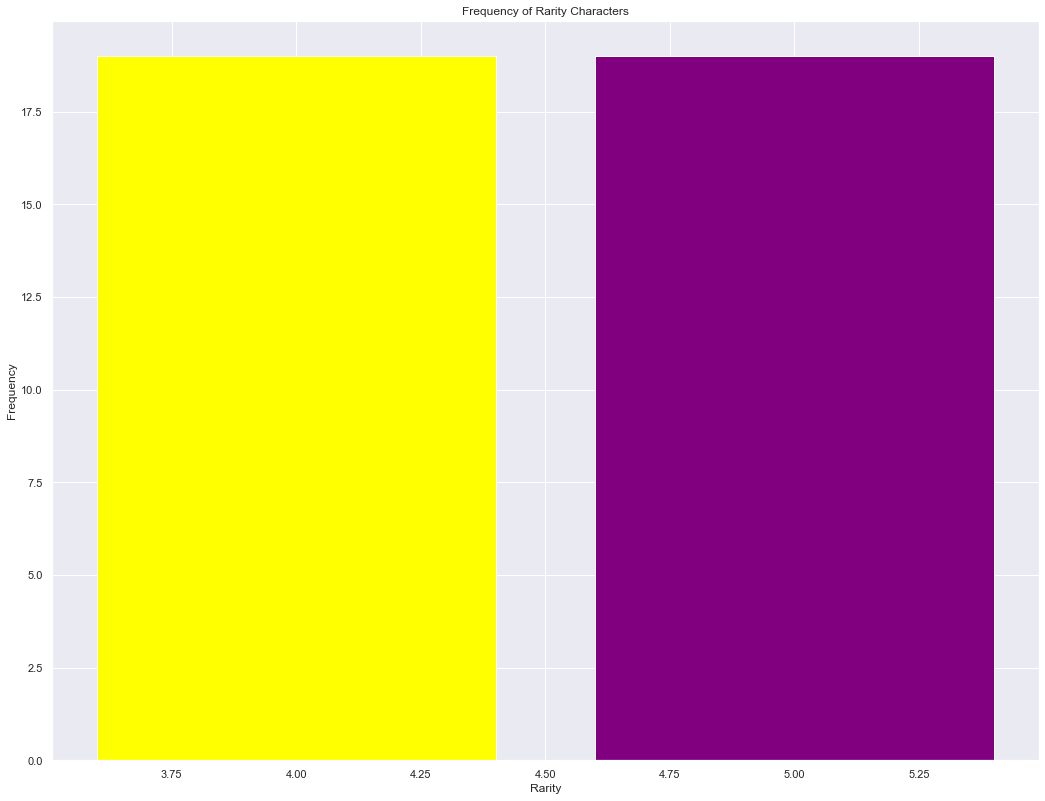

In [1631]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
unique_rarity = eda1.Rarity.unique().tolist()
rarity_frequency = []

for rarity in unique_rarity:
    rarity_frequency.append(len(eda1[eda1['Rarity'] == rarity]))

ax.bar(unique_rarity, rarity_frequency, color = ['purple', 'yellow'])
plt.title('Frequency of Rarity Characters')
plt.xlabel('Rarity')
plt.ylabel('Frequency')
plt.show()

From this graph, there also seems to be a negligble difference between the amount of 5-Star characters (excluding the Traveler and Aloy) and 4-Star Characters.

# Exploratory Data Analysis II: Machine Learning
We can move forward into the analysis. For clarity, I will restate the objectives for this tutorial moving forward:

1. Determine optimum character(s) to 'roll' for based on a linear combination of certain qualitative attributes and the existence of subteam of three or less characters.
2. Predict the probability of a similar character based on optimum character(s) being a 5-Star or 4-Star character.

### Objective One
For Objective One , we will be using the **seaborn** and **matplotlib** libraries for data visualization purposes. 

We will define a function called *plot_characters* which has the following parameters:
1. df: A dataframe. 
2. X: String. The first character attribute to consider. Must be HP, ATK, DEF or Ascention Stat Value. Must not be the same as Y. The values to this column must be numerical. X is the determing variable for the output.
3. Y: String. The second character attribute to consider. The values to this column must be numerical. Must be HP, ATK, DEF or Ascension Stat Value. Must not be the same as Y.
4. subteam: String list. A list of the names of character's on the subteam. 0 <= length of subteamt <= 3.

*plot_characters* will output three objects:
* A scatterplot of characters on an X-Y plane, along with its own Linear Regression.
* A summary of the Linear Regression between X-Y. Linear Regressions can be used on non-linear data and can the determine the relationship between two variables.
* A list of size 4 containing the names of all team memebers (including the original subteam).

In [1632]:
def plot_characters(df, X, Y, subteam):
    plt.clf()
    # Remove subteam members from df.
    index_names = []
    for index, row in df.iterrows():
        if row['Name'] in subteam:
            index_names.append(index)
    df.drop(index_names, inplace = True)
    df.index = range(len(df)) # Reindexing dataframe

    df[X] = df[X].apply(lambda x: float(x))
    df[Y] = df[Y].apply(lambda x: float(x))

    sns.set(rc={'figure.figsize':(13.7, 10.27)})
    sns.scatterplot(x=df[X], y=df[Y], hue = df['Element'], style = df['Weapon'])

    name = df['Name']
    X_list = df[X]
    Y_list = df[Y]
    for i, n in enumerate(name):
        plt.annotate(n, (X_list[i] + 1.2, Y_list[i] + 1.5), size = 7.5)

    # Plotting Regression Line
    regr = linear_model.LinearRegression()
    X_list = df[X].tolist()
    y_list = df[Y].tolist()

    regr = linear_model.LinearRegression()
    independent_np = [[x] for x in y_list]
    dependent_np = [[x] for x in X_list]
    # fit(X, y) - X is year because its our independent variable. y is dependent variable.
    regr.fit(independent_np, dependent_np)
    
    # Trying to predict the dependent variable based on our independent variable.
    dependent_prediction = regr.predict(independent_np)
    
    # Variables must be one dimensional for seaborn. Merging subarrays within life_exp_prediction.
    arr = []
    dependent_prediction = [arr.append(x[0]) for x in dependent_prediction]
    dependent_prediction = arr
    sns.lineplot(x = dependent_prediction, y = y_list)

    # Character Selection
    # There are three cases: (1) X_weight == Y_weight, (2) X_weight > Y_weight, and (3)  X_weight < Y_weight
    # If the weights are of size 3, then the length of the set returned will be of size two. In all other cases, the sets will have a length of size 1.
    choices = 4 - len(subteam)

    lst1 = subteam.copy()

    # Getting optimum characters based on X for set 1.
    df.sort_values(by = [X, Y], ascending = False, inplace=True)
    df.index = range(len(df)) # Reindexing dataframe
    
    index = 0
    for number in range(0, choices):
        lst1.insert(0 + index, df.iloc[number]['Name'])
        index = index + 1
    print(f'Intercept: {regr.intercept_[0]}')
    print(f"Coefficient: {regr.coef_[0][0]}")
    return lst1

#### Example One: General
Here is a general plot of the table against these two statistics: Y = DEF and X = ATK. Based on the output, we have gathered this much information:
1. The characters with the highest X-value (ATK) are all 5-Stars.
2. These characters all belong to different elements. 
3. There does not exist a linear relationship between DEF and ATK because the coefficient of the Linear Regression is significantly closer to 0 than to 1 i.e 0.0820.

Intercept: 198.62507079161463
Coefficient: 0.07326405628300765
['Xiao', 'Kamisato Ayaka', 'Eula', 'Raiden Shogun']


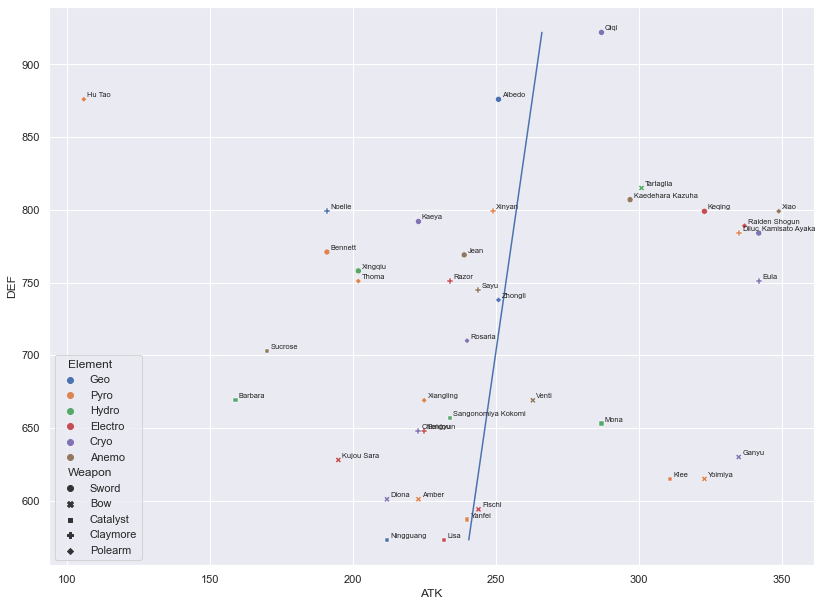

In [1633]:
print(plot_characters(df = table, X = 'ATK', Y = 'DEF', subteam = []))

#### Example Two: Element-Specific

*Why might someone consider this subteam and dataframe subset?*

Answer: Eula and Rosaria are Cryo characters, which pairs well with Pyro characters in terms of damage. Also, this subteam consists of one 5-Star (i.e Free-2-Play friendly!), which is in agreement with the intentions for this tutorial.

Here is a plot of Pyro-Element characters against: X = ATK and Y = DEF. We can draw the information as follows:
1. The plot shows that Pyro characters with the highest ATK value are 5-stars.
2. It is possible that a *negative* linear relationship exists between ATK and DEF in the Pyro-Element class because the coefficient of the Linear Regression is -0.334.

Intercept: 476.9218698921215
Coefficient: -0.33449613736859296
['Diluc', 'Yoimiya', 'Eula', 'Rosaria']


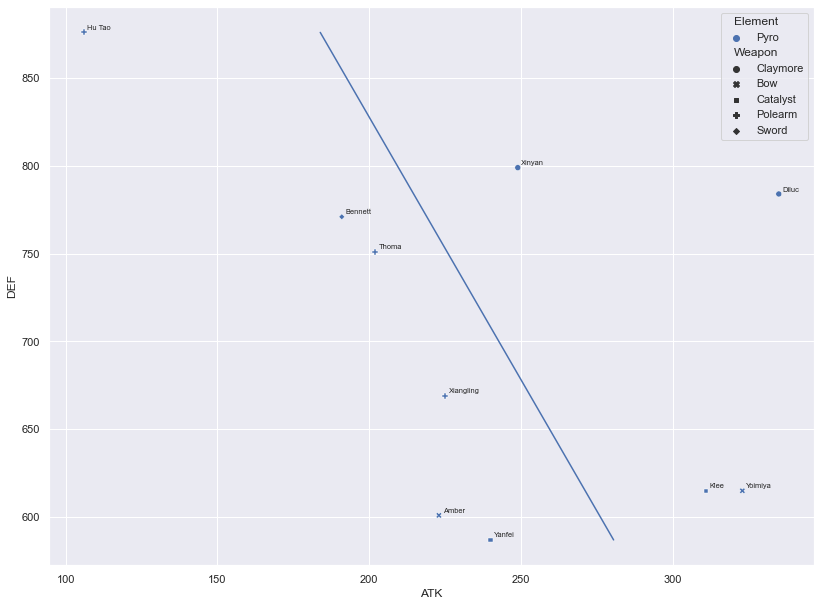

In [1634]:
print(plot_characters(df = table[table['Element'] == 'Pyro'].copy(), X = 'ATK', Y = 'DEF', subteam = ['Eula', 'Rosaria']))

#### Example Three: Multiweapon-Specific

*Why might someone consider this subteam and dataframe subset?*

Answer: Lisa and Kaeya are 4-Star characters given to players very early on in the game. Many of the challenges and quests an player may encounter early rely on a team good at exploring. Claymores and Bow users are good for exploring!

Here is a plot of Claymore-Weapon characters against: X = DEF and Y = HP. Here are our insights:
1. The plot shows that the Claymore/Bow-characters with the highest DEF values are Noelle and Xinyan.
2. As opposed to our other examples, the newly added members **contain a 5-star and 4-star.**
3. These new members are of unique Weapon and Bow classes (i.e Hydro/Bow and Geo/Claymore)

Intercept: 200.49452172889426
Coefficient: 0.04403733144766326
['Tartaglia', 'Noelle', 'Lisa', 'Kaeya']


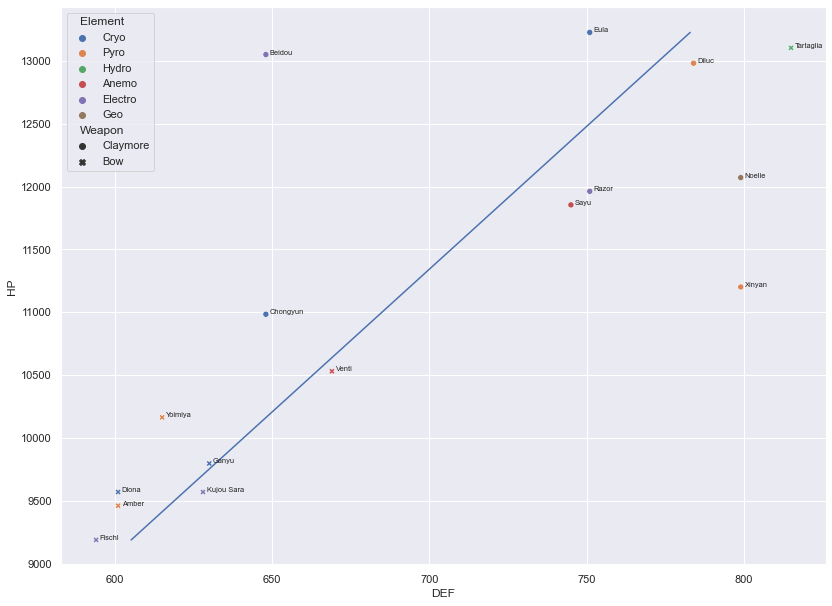

In [1635]:
print(plot_characters(df = table[(table['Weapon'] == 'Bow') | (table['Weapon'] == 'Claymore')].copy(), X = 'DEF', Y = 'HP', subteam = ['Lisa', 'Kaeya']))

### Objective Two: Machine Learning with Decision Trees

Our data shows that 5-Star characters are generally stronger than 4-Star characters. Therefore, 5-Stars are better investments for a stronger team. Acquiring many 5-Star characters is an expensive task. Our EDA can help in making informed decisions about which new team members to save up for in the future. 

Now, we want to explore whether certain attributes of a character make them more likely to be put on a Limited-Time Banner.

**Banners.csv** is a single-column csv with a list of names. The frequency of certain names determines the number of times they have been on a banner. We will be making a dataframe out of this .csv and **merging** it with our original table.

In [1636]:
banner_df = pd.read_csv('Banners.csv')
unique_names = banner_df.Name.unique().tolist()
banner_frequency = []

for name in unique_names:
    banner_frequency.append(len(banner_df[banner_df['Name'] == name]))

missing_characters = eda1.Name.unique().tolist()
missing_characters = [x for x in missing_characters if x not in unique_names]
unique_names = unique_names + missing_characters

for person in missing_characters:
    banner_frequency.append(0)

data = {'Name': unique_names, 'Banner_Frequency': banner_frequency}
banner_df = pd.DataFrame(data)
banner_df = eda1.merge(banner_df)
banner_df.sort_values(by = 'Name', inplace=True)
banner_df.index = range(len(eda1))

# Need to clean Rarity column. The values are Strings, should be integers.
temp = banner_df['Rarity'].to_list()
temp = [int(x) for x in temp] # List comprehension
banner_df['Rarity'] = temp # Reassigning columns
banner_df.index = range(len(banner_df)) # Reindexing columns
banner_df

display(banner_df)

,Name,HP,ATK,DEF,Ascension Stat,Ascention Stat Value,Element,Weapon,Sex,Nation,Rarity,Banner_Frequency
0,Albedo,13226,251,876,Geo DMG Bonus,28.8%,Geo,Sword,Male,Mondstadt,5,2
1,Barbara,9787,159,669,HP,24.0%,Hydro,Catalyst,Female,Mondstadt,4,4
2,Beidou,13050,225,648,Electro DMG Bonus,24.0%,Electro,Claymore,Female,Liyue,4,4
3,Bennett,12397,191,771,Energy Recharge,26.7%,Pyro,Sword,Male,Mondstadt,4,5
4,Chongyun,10984,223,648,ATK,24.0%,Cryo,Claymore,Male,Liyue,4,4
5,Diluc,12981,335,784,CRIT Rate,19.2%,Pyro,Claymore,Male,Mondstadt,5,0
6,Diona,9570,212,601,Cryo DMG Bonus,24.0%,Cryo,Bow,Female,Mondstadt,4,5
7,Eula,13226,342,751,CRIT DMG,38.4%,Cryo,Claymore,Female,Mondstadt,5,2
8,Fischl,9189,244,594,ATK,24.0%,Electro,Bow,Female,Mondstadt,4,4
9,Ganyu,9797,335,630,CRIT DMG,38.4%,Cryo,Bow,Female,Liyue,5,1


Briefly, let's look at some of the statistics for 5-Star characters. This can easily be done using **slicing** and **Pandas.Dataframe.describe(...)**. These results will define our assumptions.

In [1637]:
temp = banner_df[banner_df['Rarity'] == 5]
temp[['Name', 'Rarity', 'Banner_Frequency']].describe()

,Rarity,Banner_Frequency
count,19.0,19.000000
mean,5.0,1.157895
std,0.0,0.834210
min,5.0,0.000000
25%,5.0,1.000000
50%,5.0,1.000000
75%,5.0,2.000000
max,5.0,3.000000


We can see here that on average, that most 5-Star characters have appeared only once on a Limited-Time Banner.

Let's calculate the same for 4-Star characters.

In [1638]:
temp = banner_df[banner_df['Rarity'] == 4]
temp[['Name', 'Rarity', 'Banner_Frequency']].describe()

,Rarity,Banner_Frequency
count,19.0,19.000000
mean,4.0,3.263158
std,0.0,1.967573
min,4.0,0.000000
25%,4.0,1.500000
50%,4.0,4.000000
75%,4.0,5.000000
max,4.0,6.000000


Interesting! On average, 4-Star characters have been on 3 Banners.

We will define a new column called 'Will_Rerun' with values of 1 for 'Yes' and 0 for '1'. 

This is operating under two assumptions: 
1. A 4-Star character with a high Banner Frequency is likely to have a rerun soon. 
2. A 5-Star character with a low Banner Frequency is not likely to have a rerun soon.

In [1639]:
will_rerun = []
for index, row in banner_df.iterrows():
    if row['Banner_Frequency'] < 2 and row['Rarity'] == 5:
        will_rerun.append(1)
    elif row['Banner_Frequency'] <= 2 and row['Rarity'] == 4:
        will_rerun.append(0)
    elif row['Banner_Frequency'] >= 2 and row['Rarity'] == 5:
        will_rerun.append(0)
    elif row['Banner_Frequency'] >= 3 and row['Rarity'] == 4:
        will_rerun.append(1)
banner_df['will_rerun'] = will_rerun
banner_df

,Name,HP,ATK,DEF,Ascension Stat,Ascention Stat Value,Element,Weapon,Sex,Nation,Rarity,Banner_Frequency,will_rerun
0,Albedo,13226,251,876,Geo DMG Bonus,28.8%,Geo,Sword,Male,Mondstadt,5,2,0
1,Barbara,9787,159,669,HP,24.0%,Hydro,Catalyst,Female,Mondstadt,4,4,1
2,Beidou,13050,225,648,Electro DMG Bonus,24.0%,Electro,Claymore,Female,Liyue,4,4,1
3,Bennett,12397,191,771,Energy Recharge,26.7%,Pyro,Sword,Male,Mondstadt,4,5,1
4,Chongyun,10984,223,648,ATK,24.0%,Cryo,Claymore,Male,Liyue,4,4,1
5,Diluc,12981,335,784,CRIT Rate,19.2%,Pyro,Claymore,Male,Mondstadt,5,0,1
6,Diona,9570,212,601,Cryo DMG Bonus,24.0%,Cryo,Bow,Female,Mondstadt,4,5,1
7,Eula,13226,342,751,CRIT DMG,38.4%,Cryo,Claymore,Female,Mondstadt,5,2,0
8,Fischl,9189,244,594,ATK,24.0%,Electro,Bow,Female,Mondstadt,4,4,1
9,Ganyu,9797,335,630,CRIT DMG,38.4%,Cryo,Bow,Female,Liyue,5,1,1


In order to use this specific Decision Tree algorithm, we need to encode our categorical variables as numerical values. We can do this using **One Hot Enconding.** One Hot Encoding converts integer encodings to binary variables for the algorithm to interpret.

The objective is to have two sets of data: our training data and testing data. Both come from the original data set, but we will train the Decision Tree model *only* on the training data. It will test itself using the testing data. Splitting the dataframe can easily be done using **sklearn's train_test_split(...)**.

Code Reference: <a href='https://learn.co/lessons/dsc-decision-trees-with-sklearn-codealong'>Learn.co</a>.

In [1640]:
X = banner_df[['Element', 'Weapon', 'Sex', 'Nation', 'Rarity']]
y = banner_df[['will_rerun']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# One-hot encode the training data and show the resulting DataFrame with proper column names
ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

ohe_df.head()

,Element_Anemo,Element_Cryo,Element_Electro,Element_Geo,Element_Hydro,Element_Pyro,Weapon_Bow,Weapon_Catalyst,Weapon_Claymore,Weapon_Polearm,Weapon_Sword,Sex_Female,Sex_Male,Nation_Inazuma,Nation_Liyue,Nation_Mondstadt,Nation_Snezhnaya,Rarity_4,Rarity_5
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Now, we can train our data set.

In [1641]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy')

Plotting the Decision Tree.

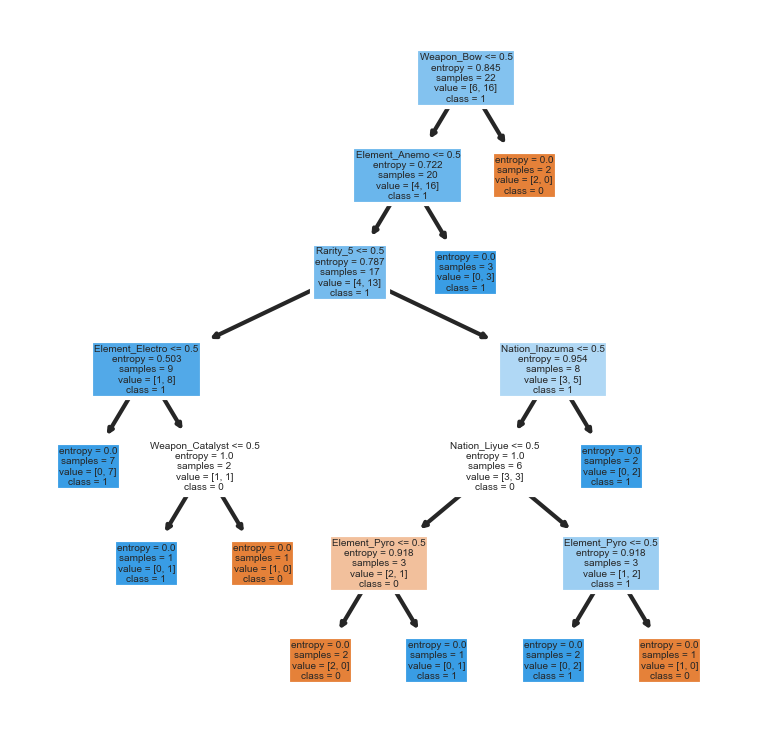

In [1642]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = ohe_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [1643]:
X_test_ohe = ohe.transform(X_test)
y_preds = clf.predict(X_test_ohe)

Now, we can determine the accuracy of our model using **cross validation**. Similar for Decision Trees, we will also **encode** our categorical variables for this validation. The encoding used here returns a sparse matrix, but the **cross_val_score** function expects a numpy array. Conversion from a sparse matrix to a numpy array is easily done using the **numpy** function.

In [1644]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
X_ohe = pd.DataFrame.sparse.from_spmatrix(ohe.transform(X))
X_numpy = X_ohe.to_numpy()

y_ohe = y.copy()
y_numpy = y_ohe.to_numpy()
scores = cross_val_score(clf, X_numpy, y_numpy, scoring='accuracy', cv=cv) # Computes 10 scores
print('Mean Accuracy: %.3f, Standard Error: (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.500, Standard Error: (0.251)


# Conclusion: Interpreting the Results

Nice! We have successfully generated a decision tree based on our binary class and categorical variables. Here are some helpful tips on interpreting the graph:

1. Define any character. For example, perhaps you desire 'Albedo' whose attributes we already know (Element: Geo, Weapon: Sword, etc). Or create an entirely new character with their own attributes!
2. Go down the left branch if the Node evaluates to 'True'. Go down the right if the Node evaluates to 'False.'
3. If you hit a blue leaf, your desired character is likely to run. If you hit an orange leaf, unfortunately, your desired character is not likely to run. Consider saving money/wishes for a different character.

It is also important to note that everytime this .ipynb file is run, the Decision Tree will retrain itself and generate different accuracy results. Based on a series of tests, our accuracies tend to be within the 0.3 to 0.5. Many factors such as the multicolinearity of features and dataset size, can play into these scores which stretch beyond the scope of this tutorial. However, this is just an introduction into Data Science and Machine Learning using a very young dataset. In the future, perhaps we can fine tune our hyperparameters with more data leading to higher accuracy.

Thanks for reading and may your Gacha be blessed.

# Reference List

## Libraries Used
* Pandas
* Beautiful Soup
* Seaborn 
* Matplotlib
* sklearn
* numpy

## Concepts Covered
* Parsing 
* Dataframe Slicing and Merging
* Linear Regression
* One Hot Encoding
* Decision Trees
* Cross Validation